#LightGBM（特徴量：RM）の予測値の可視化

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2
# !pip install lightgbm==3.3.5

In [ ]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
import lightgbm as lgb
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__) 
print(lgb.__version__)

1.5.3
1.22.4
3.7.1
1.2.2
3.3.5


In [ ]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df.head()

In [ ]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ['RM']] # 特徴量に100件のRM（平均部屋数）を設定
y_train = df.loc[:99, 'MEDV'] # 正解値に100件のMEDV（住宅価格）を設定
print('X_train:', X_train[:3])
print('y_train:', y_train[:3])

X_train:       RM
0  6.575
1  6.421
2  7.185
y_train: 0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


In [ ]:
# ハイパーパラメータの設定
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)

params = {
    'objective': 'mse',
    'metric': 'mse',
    'learning_rate': 0.8,
    'max_depth': 1,
    'min_data_in_leaf': 1,
    'min_data_in_bin': 1,
    'max_bin': 100,
    'seed': 0,
    'verbose': -1,
}

In [ ]:
# モデルの学習
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=1,
                  valid_sets=[lgb_train],
                  valid_names=['train'])

[1]	train's l2: 17.1003


In [ ]:
# 学習データの予測と評価
y_train_pred = model.predict(X_train)
print('MSE train: %.2f' % (mean_squared_error(y_train, y_train_pred)))

MSE train: 17.10


In [ ]:
# 予測値
model.predict(X_train)

array([21.040891  , 21.040891  , 31.60846732, 31.60846732, 31.60846732,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       31.60846732, 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.040891  ,
       31.60846732, 21.040891  , 31.60846732, 21.040891  , 21.040891  ,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 31.60846732,
       21.040891  , 21.040891  , 21.040891  , 21.040891  , 21.04

<Axes: >

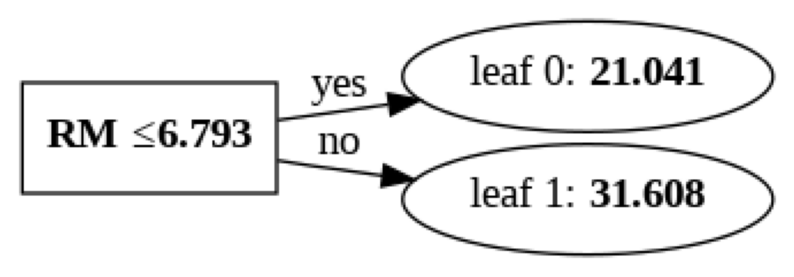

In [ ]:
# 木の可視化
lgb.plot_tree(model, tree_index=0, figsize=(10, 10))

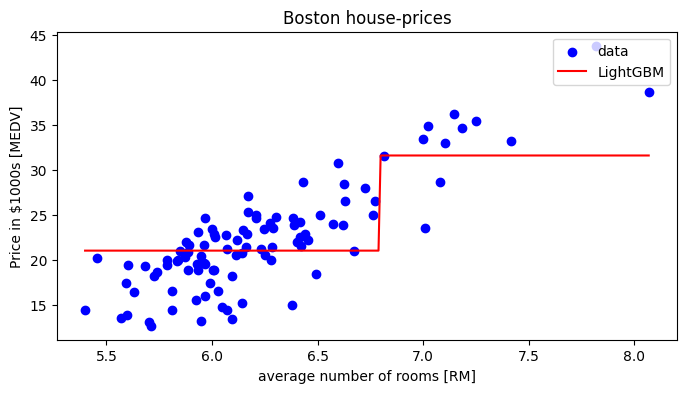

In [ ]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(平均部屋数と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red', label='LightGBM')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='upper right')
plt.show()

#分割点と予測値の検証

In [ ]:
# 初期値
print('samples:', len(y)) # レコード数
pred0 = sum(y)/len(y) # 予測値（平均）
print('pred0:', pred0)

samples: 100
pred0: 22.30900000000001


In [ ]:
# 左葉のレコード
threshold = 6.793 # 左右に分割する分割点
X_left = X[X<=threshold] # 左葉の特徴量
y_left = y[X<=threshold] # 左葉の正解値
print('X_left:', X_left)
print('')
print('y_left:', y_left)

X_left: [6.575 6.421 6.43  6.012 6.172 5.631 6.004 6.377 6.009 5.889 5.949 6.096
 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813 5.924 5.599 5.813
 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933 5.841 5.85  5.966
 6.595 6.77  6.169 6.211 6.069 5.682 5.786 6.03  5.399 5.602 5.963 6.115
 6.511 5.998 5.888 6.383 6.145 5.927 5.741 5.966 6.456 6.762 6.29  5.787
 5.878 5.594 5.885 6.417 5.961 6.065 6.245 6.273 6.286 6.279 6.14  6.232
 5.874 6.727 6.619 6.302 6.167 6.389 6.63  6.015 6.121 6.417 6.405 6.442
 6.211 6.249 6.625 6.163]

y_left: [24.  21.6 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4 18.2 19.9 23.1
 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 18.4 21.  12.7
 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 26.6 25.3 24.7 21.2 19.3
 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 24.7 23.3 19.6 18.7 16.
 22.2 25.  23.5 19.4 22.  17.4 20.9 24.2 21.7 22.8 23.4 24.1 21.4 20.
 20.8 21.2 20.3 28.  23.9 24.8 22.9 23.9 26.6 22.5 22.2 22.6 22.  22.9
 25.  20.6 28.4 21.4]


In [ ]:
# 左葉の予測値
print('samples_left:', len(y_left)) # 左葉のレコード数
residual_left = y_left - pred0 # 残差
weight_left = sum(residual_left)/len(y_left) # 重み
print('weight_left:', weight_left)
y_pred_left = pred0 + 0.8 * weight_left # 左葉の予測値
print('y_pred_left:', y_pred_left)

samples_left: 88
weight_left: -1.5851363636363767
y_pred_left: 21.040890909090912


In [ ]:
# 右葉のレコード
X_right = X[threshold<X] # 右葉の特徴量
y_right = y[threshold<X] # 右葉の正解値
print('X_right:', X_right)
print('y_right:', y_right)

X_right: [7.185 6.998 7.147 7.024 7.249 6.816 7.104 7.007 7.079 8.069 7.82  7.416]
y_right: [34.7 33.4 36.2 34.9 35.4 31.6 33.  23.6 28.7 38.7 43.8 33.2]


In [ ]:
# 右葉の予測値
print('samples_right:', len(y_right)) # 右葉のレコード数
residual_right = y_right - pred0 # 残差
weight_right = sum(residual_right)/len(y_right) # 重み
print('weight_right:', weight_right)
y_pred_right = pred0 + 0.8 * weight_right # 右葉の予測値
print('y_pred_right:', y_pred_right)

samples_right: 12
weight_right: 11.624333333333324
y_pred_right: 31.608466666666672


#特徴量RMのヒストグラム(5.4節のLightGBMの説明で掲載)

array([[<Axes: title={'center': 'RM'}>]], dtype=object)

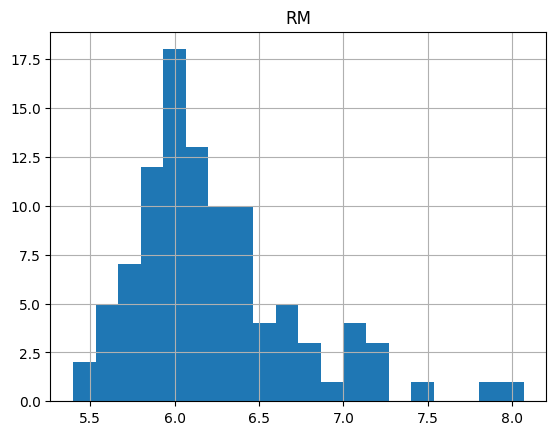

In [ ]:
# max_bin=20
X_train = df.loc[:99, ['RM']] # 特徴量に100件のRM（平均部屋数）を設定
X_train.hist(bins=20) # 100件レコードに対してbinが20のヒストグラム

array([[<Axes: title={'center': 'RM'}>]], dtype=object)

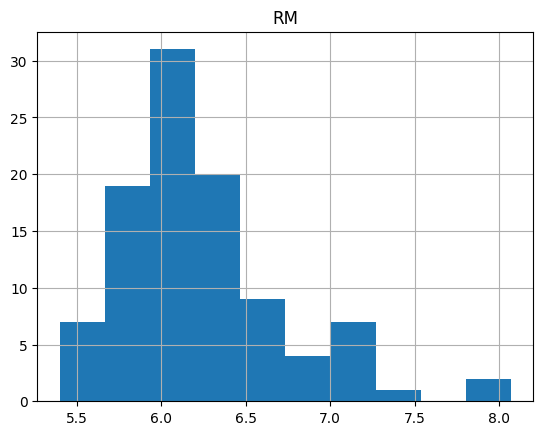

In [ ]:
# max_bin=10
X_train.hist(bins=10) # 100件レコードに対してbinが10のヒストグラム